In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# 1. Create a sample dataset
X, y = make_classification(n_samples=500,    # number of samples
                           n_features=10,    # number of features
                           n_informative=5,  # informative features
                           n_redundant=2,    # redundant features
                           n_classes=2,      # binary classification
                           random_state=42)

# 2. Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# 3. Define K-Fold Cross Validation
kf = KFold(n_splits=5,          # number of folds
           shuffle=True,        # shuffle data before splitting
           random_state=42)

# 4. Perform Cross Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# 5. Display results
print("K-Fold Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


K-Fold Accuracy Scores: [0.82 0.86 0.81 0.87 0.83]
Mean Accuracy: 0.8380000000000001
Standard Deviation: 0.023151673805580447


Number of selected features: 30 --> Test Accuracy: 0.9561
Number of selected features: 29 --> Test Accuracy: 0.9649
Number of selected features: 28 --> Test Accuracy: 0.9649
Number of selected features: 27 --> Test Accuracy: 0.9649
Number of selected features: 26 --> Test Accuracy: 0.9649
Number of selected features: 25 --> Test Accuracy: 0.9737
Number of selected features: 24 --> Test Accuracy: 0.9737
Number of selected features: 23 --> Test Accuracy: 0.9737
Number of selected features: 22 --> Test Accuracy: 0.9737
Number of selected features: 21 --> Test Accuracy: 0.9737
Number of selected features: 20 --> Test Accuracy: 0.9737
Number of selected features: 19 --> Test Accuracy: 0.9737
Number of selected features: 18 --> Test Accuracy: 0.9737
Number of selected features: 17 --> Test Accuracy: 0.9737
Number of selected features: 16 --> Test Accuracy: 0.9649
Number of selected features: 15 --> Test Accuracy: 0.9649
Number of selected features: 14 --> Test Accuracy: 0.9649
Number of sele

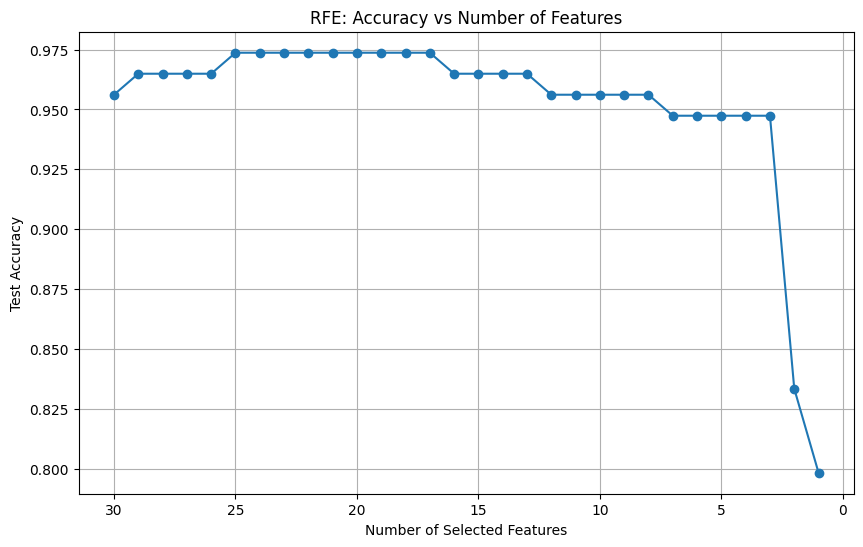

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data        # Features
y = data.target      # Target labels
feature_names = data.feature_names

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the base model (Logistic Regression)
log_reg = LogisticRegression(max_iter=5000, solver="liblinear")

# Track the performance for different numbers of selected features
n_features = X_train.shape[1]   # total number of features
results = []

for k in range(n_features, 0, -1):
    # Apply RFE with k selected features
    rfe = RFE(estimator=log_reg, n_features_to_select=k, step=1)
    rfe.fit(X_train, y_train)

    # Transform the dataset
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    # Train and evaluate model
    log_reg.fit(X_train_rfe, y_train)
    y_pred = log_reg.predict(X_test_rfe)
    acc = accuracy_score(y_test, y_pred)

    results.append((k, acc))
    print(f"Number of selected features: {k:2d} --> Test Accuracy: {acc:.4f}")

# Find the best number of features
best_k, best_acc = max(results, key=lambda x: x[1])
print("\nBest number of features:", best_k)
print("Best test accuracy:", best_acc)

# Plot Accuracy vs Number of Features
num_features, accuracies = zip(*results)

plt.figure(figsize=(10,6))
plt.plot(num_features, accuracies, marker='o')
plt.xlabel("Number of Selected Features")
plt.ylabel("Test Accuracy")
plt.title("RFE: Accuracy vs Number of Features")
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()